### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [150]:
data = pd.read_csv('/content/sample_data/coupons.csv')

# New Section

In [76]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [77]:
#Checking for Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [78]:
#Checking Data Types
data_types = data.dtypes
print("\nData Types:\n", data_types)


Data Types:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [79]:
#Displaying Summary Statistics
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
         temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.00000

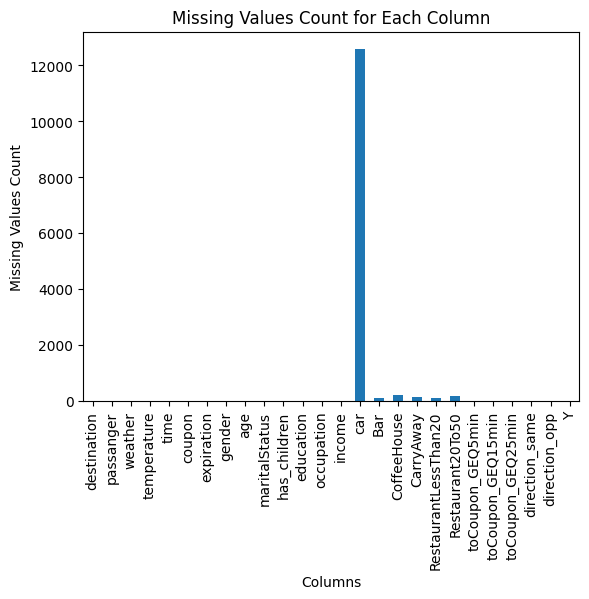

In [80]:
#A bar plot can show the count of missing values for each column
missing_values_plot = data.isnull().sum().plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count for Each Column')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [81]:
#drop rows for bar, CoffeeHouse, RestaurantLessThan20,Restaurant20To50, CarryAway coloumn only
data = data.dropna(subset=['Bar', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50', 'CarryAway'])
missing_values_1 = data.isnull().sum()
print("Missing Values:\n", missing_values_1)
print(data.shape)

Missing Values:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     11971
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
(12079, 26)


In [82]:
#drop car coloumn from data table
data = data.drop(columns=['car'])
missing_values_2 = data.isnull().sum()
print("Missing Values:\n", missing_values_2)
print(data.shape)
data.head()

Missing Values:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64
(12079, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [83]:
#Calculate Total Observations
total_observations = len(data)
print("Total Observations:", total_observations)

Total Observations: 12079


In [84]:
#Calculate Accepted Coupons
accepted_coupons = data['Y'].sum()
print("Accepted Coupons:", accepted_coupons)

Accepted Coupons: 6877


In [85]:
#Calculate Proportion
proportion = accepted_coupons / total_observations
print("Proportion:", proportion)

Proportion: 0.5693352098683666


**The proportion of total observations that chose to accept the coupon is approximately 0.568 (or 56.8%).**

5. Use a bar plot to visualize the `coupon` column.

In [86]:
#Count the Number of Each Coupon Type
coupon_counts = data['coupon'].value_counts()
print(coupon_counts)

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64


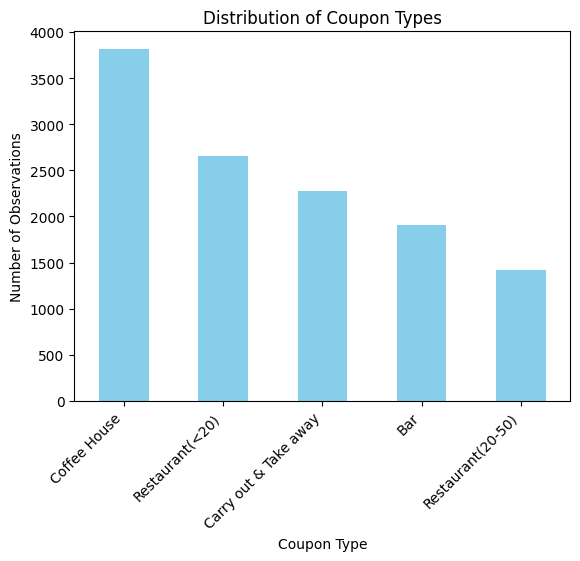

In [73]:
#Create a Bar Plot
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, ha='right')
plt.show()

6. Use a histogram to visualize the temperature column.

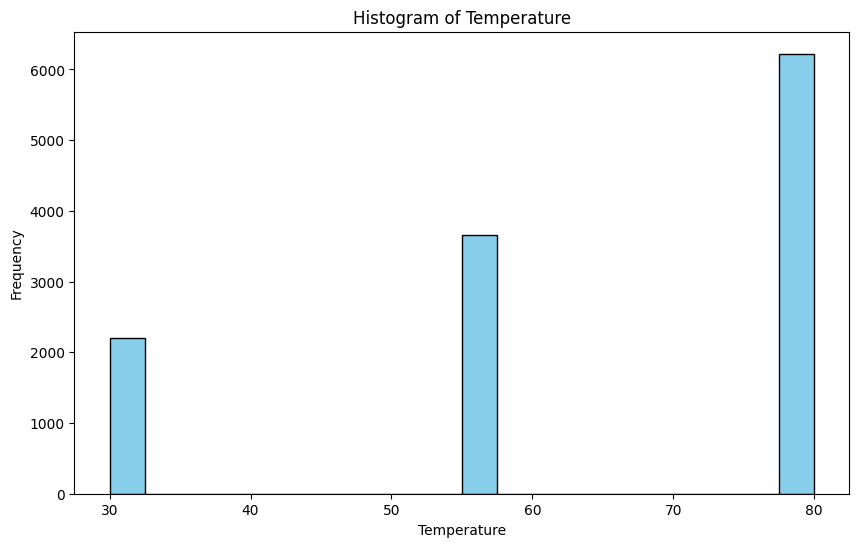

In [87]:
# Create a histogram to visualize the temperature column
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Explanation:**

*   **Temperature**: The x-axis represents the temperature values.
*   **Frequency**: The y-axis represents the frequency of each temperature value in the dataset
*   **Bins**: The histogram is divided into 20 bins to show the distribution of temperature values
*   **Color**: The bars are colored in sky blue with black edges for better visualization


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [89]:
bar_coupons_data = data[data['coupon'] == 'Bar']
print(bar_coupons_data.head())

        destination  passanger weather  temperature  time coupon expiration  \
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   
39             Work      Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
57             Home      Alone   Sunny           55   6PM    Bar         1d   

   gender age maritalStatus  ...  CoffeeHouse CarryAway RestaurantLessThan20  \
24   Male  21        Single  ...        less1       4~8                  4~8   
35   Male  21        Single  ...        less1       4~8                  4~8   
39   Male  21        Single  ...        less1       4~8                  4~8   
46   Male  46        Single  ...          4~8       1~3                  1~3   
57   Male  46        Single  ...          4~8       1~3                  1~3   

   Restaurant20To50 toCoupon_GEQ5min toCoupo

2. What proportion of bar coupons were accepted?


In [92]:
#Total Bar Coupons: The total number of bar coupons in the dataset.
total_bar_coupons = len(bar_coupons_data)
print("Total Bar Coupons:", total_bar_coupons)

Total Bar Coupons: 1913


In [94]:
#Accepted Bar Coupons: The number of bar coupons that were accepted (where Y is 1).
accepted_bar_coupons = bar_coupons_data['Y'].sum()
print("Accepted Bar Coupons:", accepted_bar_coupons)

Accepted Bar Coupons: 788


In [95]:
#Proportion Accepted
proportion_accepted = accepted_bar_coupons / total_bar_coupons
print("Proportion Accepted:", proportion_accepted)

Proportion Accepted: 0.41191845269210664


**The proportion of bar coupons that were accepted is approximately 0.410 (or 41.0%).**

In [96]:
#Rejected: The red bar represents the number of bar coupons that were rejected.
rejected_bar_coupons = total_bar_coupons - accepted_bar_coupons
print("Rejected Bar Coupons:", rejected_bar_coupons)

Rejected Bar Coupons: 1125


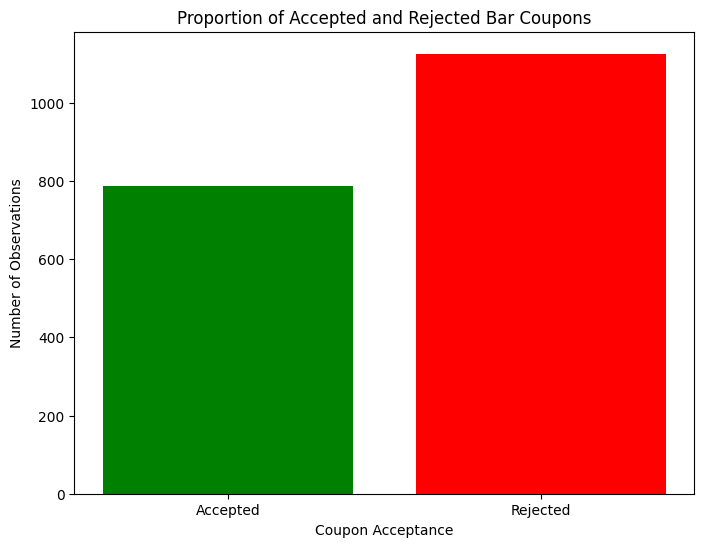

In [100]:
# Create a bar plot to visualize the proportion of accepted and rejected bar coupons
plt.figure(figsize=(8, 6))
plt.bar(['Accepted', 'Rejected'], [accepted_bar_coupons, rejected_bar_coupons], color=['green', 'red'])
plt.title('Proportion of Accepted and Rejected Bar Coupons')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Number of Observations')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [127]:
#Group 1: Individuals who went to a bar 3 or fewer times a month ('never', 'less1', '1~3')
group1 = bar_coupons_data[bar_coupons_data['Bar'].isin(['never', 'less1', '1~3'])]

#Group 2: Individuals who went to a bar more than 3 times a month ('4~8', 'gt8').
group2 = bar_coupons_data[bar_coupons_data['Bar'].isin(['4~8', 'gt8'])]

In [128]:
# Calculate the acceptance rate for each group
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()

# Print
print("Acceptance Rate for Group 1:", acceptance_rate_group1)
print("Acceptance Rate for Group 2:", acceptance_rate_group2)

Acceptance Rate for Group 1: 0.37267441860465117
Acceptance Rate for Group 2: 0.7616580310880829


**Acceptance Rates:**


*  Group 1 (3 or fewer times a month): Approximately 37.26% acceptance rate.
*  Group 2 (More than 3 times a month): Approximately 76.16% acceptance rate.

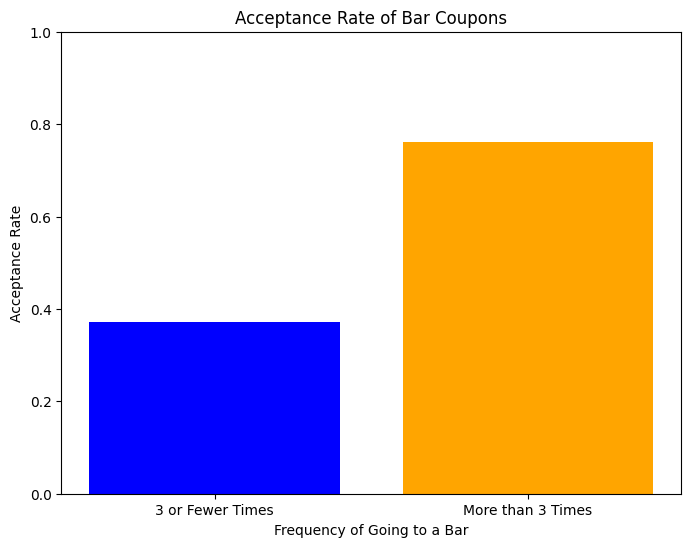

In [129]:
# Create a bar plot to visualize the acceptance rates
plt.figure(figsize=(8, 6))
plt.bar(['3 or Fewer Times', 'More than 3 Times'], [acceptance_rate_group1, acceptance_rate_group2], color=['blue', 'orange'])
plt.title('Acceptance Rate of Bar Coupons')
plt.xlabel('Frequency of Going to a Bar')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [132]:
#Convert age column to numeric, setting errors='coerce' to handle non-numeric values
data['age'] = pd.to_numeric(data['age'], errors='coerce')

#Group 1: Drivers who go to a bar more than once a month and are over the age of 25.
group_drivers_over_25_more_than_once = data[(data['Bar'].isin(['4~8', 'gt8', '1~3'])) & (data['age'] > 25)]

#Group 2: All other drivers
group_other_drivers = data[~((data['Bar'].isin(['4~8', 'gt8', '1~3'])) & (data['age'] > 25))]

In [133]:
# Calculate the acceptance rate for each group
acceptance_rate_group_drivers_over_25_more_than_once = group_drivers_over_25_more_than_once['Y'].mean()
acceptance_rate_group_other_drivers = group_other_drivers['Y'].mean()

#print
print("Acceptance Rate for Drivers over 25 who go to a bar more than once a month:", acceptance_rate_group_drivers_over_25_more_than_once)
print("Acceptance Rate for Other Drivers:", acceptance_rate_group_other_drivers)

Acceptance Rate for Drivers over 25 who go to a bar more than once a month: 0.6941176470588235
Acceptance Rate for Other Drivers: 0.5657211006048215


**RESULT**

*  Group 1: The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is approximately 69.41%.
*  Group 2: The acceptance rate for all other drivers is approximately 56.57%.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [134]:
#Filter for drivers who go to a bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry
group_drivers_more_than_once_no_kid_not_farming = data[(data['Bar'].isin(['4~8', 'gt8', '1~3'])) &
                                                     (data['passanger'] != 'Kid(s)') &
                                                     (~data['occupation'].isin(['Farming Fishing & Forestry']))]

# Filter for all other drivers
group_all_others = data[~((data['Bar'].isin(['4~8', 'gt8', '1~3'])) &
                        (data['passanger'] != 'Kid(s)') &
                        (~data['occupation'].isin(['Farming Fishing & Forestry'])))]

In [135]:
# Calculate the acceptance rate for each group
acceptance_rate_group_drivers_more_than_once_no_kid_not_farming = group_drivers_more_than_once_no_kid_not_farming['Y'].mean()
acceptance_rate_group_all_others = group_all_others['Y'].mean()

#print acceptance rate for each group
print("Acceptance Rate for Group 1 (Drivers who go to bars more than once a month, no kid passengers, non-farming occupations):", acceptance_rate_group_drivers_more_than_once_no_kid_not_farming)
print("Acceptance Rate for Group 2 (All other drivers):", acceptance_rate_group_all_others)

Acceptance Rate for Group 1 (Drivers who go to bars more than once a month, no kid passengers, non-farming occupations): 0.625
Acceptance Rate for Group 2 (All other drivers): 0.5460734828031459


**Result**

*   Group 1: The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is approximately 62.5%.

*   Group 2: The acceptance rate for all other drivers is approximately 54.6%.



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [136]:
#Combined Group: Drivers who meet any of the criteria in Group 1, Group 2, or Group 3.
#Group 1: Drivers who: Go to bars more than once a month, Had passengers that were not a kid, Were not widowed.
#Group 2: Drivers who: Go to bars more than once a month, Are under the age of 30.
#Group 3: Drivers who: Go to cheap restaurants more than 4 times a month, Have an income less than 50K.

group_1 = data[(data['Bar'].isin(['4~8', 'gt8', '1~3'])) &
             (data['passanger'] != 'Kid(s)') &
             (data['maritalStatus'] != 'Widowed')]

group_2 = data[(data['Bar'].isin(['4~8', 'gt8', '1~3'])) &
             (data['age'] < 30)]

group_3 = data[(data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
             (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]

In [137]:
# Combine the three groups using OR condition
combined_group = pd.concat([group_1, group_2, group_3]).drop_duplicates()

# Filter for all other drivers
group_all_others = data[~data.index.isin(combined_group.index)]

In [138]:
#print
print("Combined Group Acceptance Rate:", combined_group['Y'].mean())
print("All Other Drivers Acceptance Rate:", group_all_others['Y'].mean())

Combined Group Acceptance Rate: 0.6055995130858186
All Other Drivers Acceptance Rate: 0.5443356643356644


**Result**

*  Combined Group: The acceptance rate for drivers who meet any of the specified criteria is approximately 60.5%.
*  All Other Drivers: The acceptance rate for all other drivers is approximately 54.4%

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations from the analysis, we can hypothesize several characteristics and behaviors about drivers who accepted the bar coupons:

### Hypotheses:
1. **Frequent Bar-Goers**:
   - Drivers who go to bars more than once a month are more likely to accept bar coupons. This suggests that frequent bar-goers find these coupons relevant and valuable, possibly because they align with their regular social activities.

2. **Age Factor**:
   - Younger drivers, particularly those under the age of 30, show a higher acceptance rate for bar coupons. This could indicate that younger individuals are more inclined to engage in social activities like going to bars and are more receptive to related promotions.

3. **Passenger Influence**:
   - Drivers who have passengers that are not kids are more likely to accept bar coupons. This might be because adult passengers are more likely to participate in social activities like going to bars, making the coupons more appealing.

4. **Marital Status**:
   - Drivers who are not widowed have a higher acceptance rate for bar coupons. This could be related to social behavior patterns, where individuals who are not widowed might be more socially active and thus find bar coupons more useful.

5. **Income and Dining Habits**:
   - Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K are more likely to accept bar coupons. This suggests that individuals who frequently dine out and have a lower income might be more attracted to discounts and promotions, including bar coupons.

**Independent Investigation**

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [151]:
data_1 = pd.read_csv('/content/sample_data/coupons.csv')

In [152]:
coupons = data_1['coupon'].unique()

print("Different coupons listed in the 'coupon' column:")
for coupon in coupons:
    print(coupon)

Different coupons listed in the 'coupon' column:
Restaurant(<20)
Coffee House
Carry out & Take away
Bar
Restaurant(20-50)


**ACCEPTANCE RATE FOR COFFEE COUPONS**

In [170]:
# Filter for CoffeeHouse coupons
coffeehouse_coupons_df = data_1[data_1['coupon'] == 'Coffee House']

# Calculate the acceptance rate for CoffeeHouse coupons
acceptance_rate_coffeehouse = coffeehouse_coupons_df['Y'].mean()
print("Acceptance Rate for CoffeeHouse Coupons:", acceptance_rate_coffeehouse)

# Analyze the characteristics of passengers who accept CoffeeHouse coupons
accepted_coffeehouse_coupons_df = coffeehouse_coupons_df[coffeehouse_coupons_df['Y'] == 1]

# Display basic information about the accepted CoffeeHouse coupons DataFrame
print(accepted_coffeehouse_coupons_df.info())

# Display summary statistics for numerical columns
print(accepted_coffeehouse_coupons_df.describe())


Acceptance Rate for CoffeeHouse Coupons: 0.49924924924924924
<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 12 to 12631
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1995 non-null   object
 1   passanger             1995 non-null   object
 2   weather               1995 non-null   object
 3   temperature           1995 non-null   int64 
 4   time                  1995 non-null   object
 5   coupon                1995 non-null   object
 6   expiration            1995 non-null   object
 7   gender                1995 non-null   object
 8   age                   1995 non-null   object
 9   maritalStatus         1995 non-null   object
 10  has_children          1995 non-null   int64 
 11  education             1995 non-null   object
 12  occupation            1995 non-null   object
 13  income                1995 non-null   object
 14  car                   19 non-n

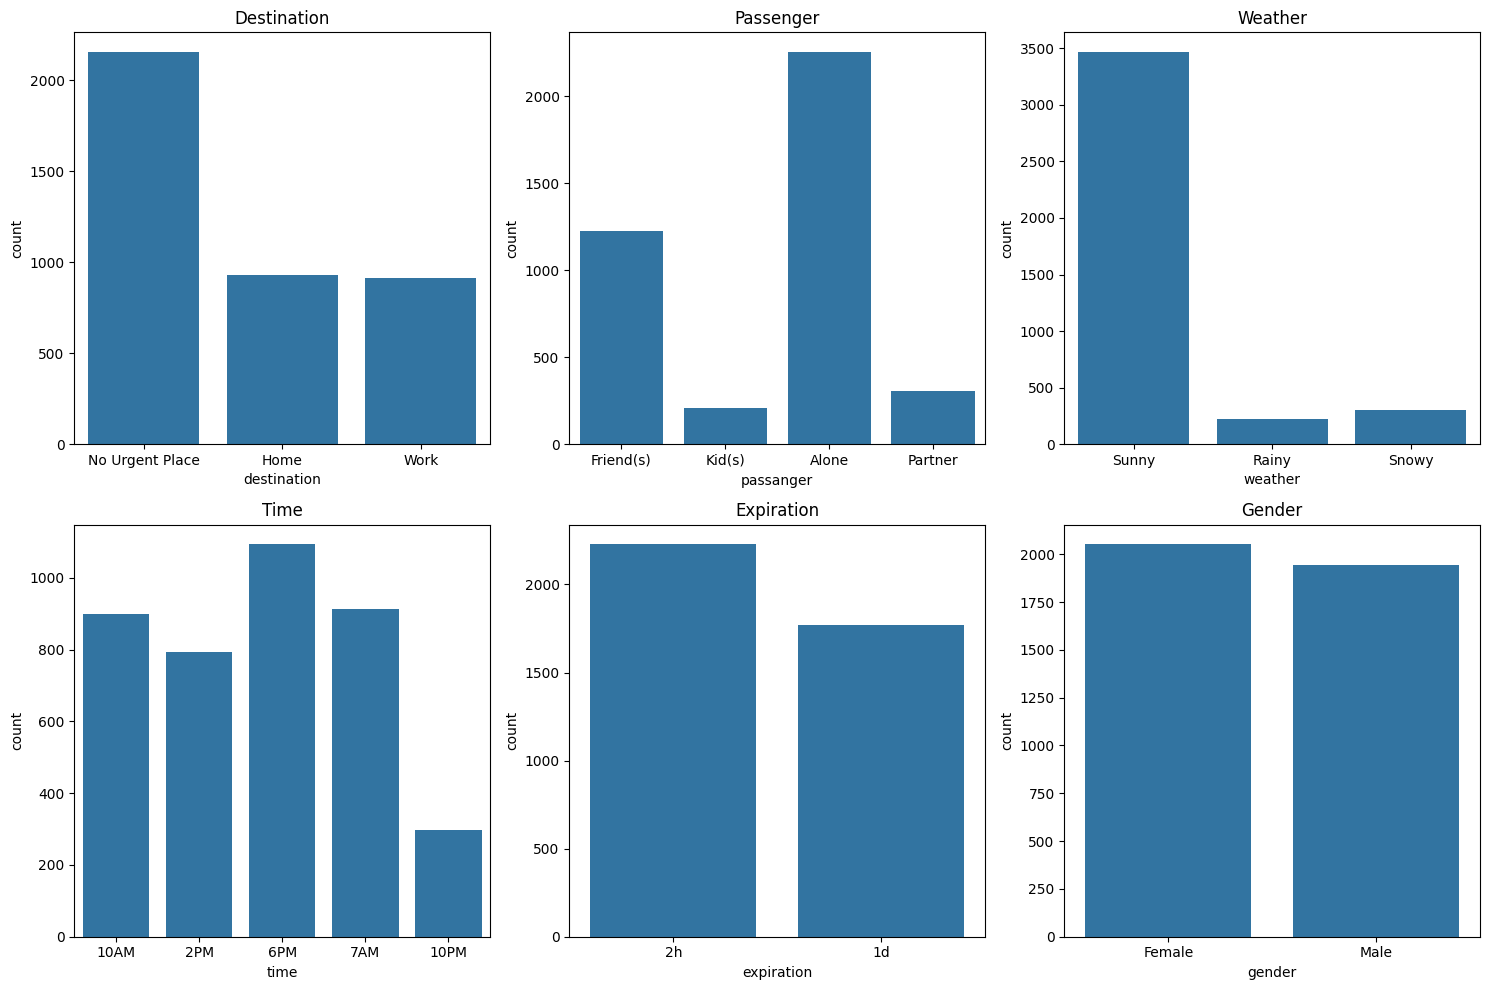

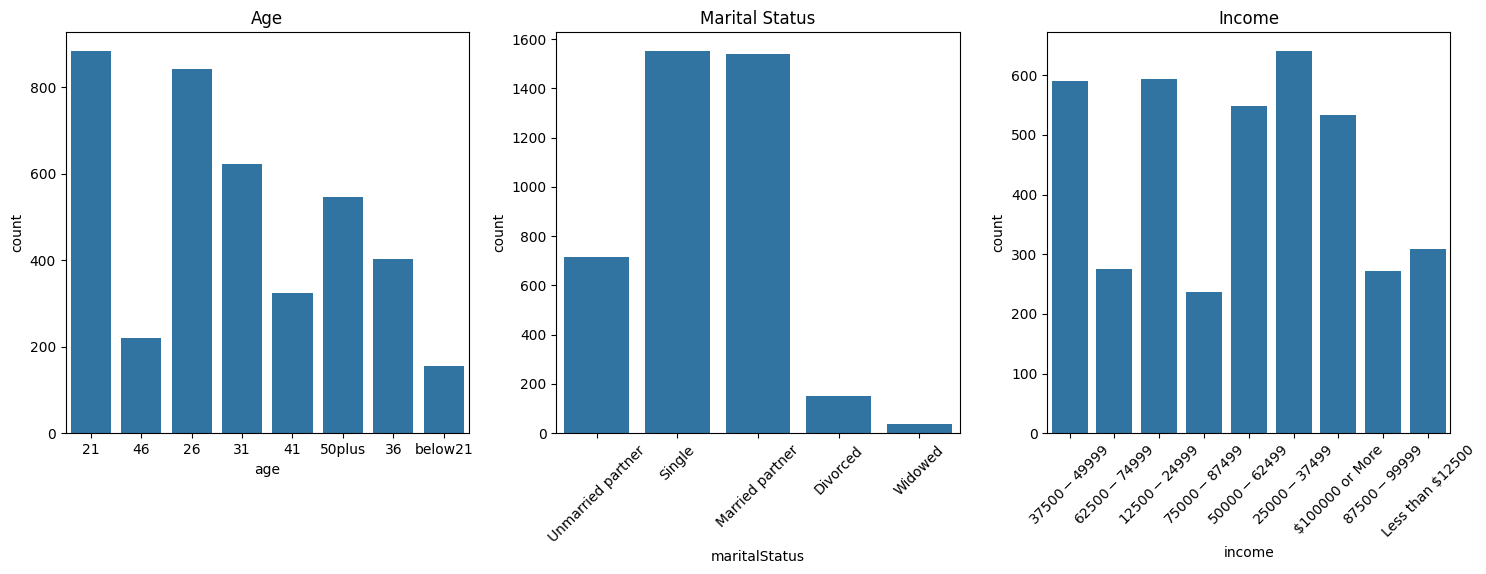

In [173]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot the characteristics of passengers who accept the coupon for Coffee House
plt.subplot(2, 3, 1)
sns.countplot(data=coffeehouse_coupons_df, x='destination')
plt.title('Destination')

plt.subplot(2, 3, 2)
sns.countplot(data=coffeehouse_coupons_df, x='passanger')
plt.title('Passenger')

plt.subplot(2, 3, 3)
sns.countplot(data=coffeehouse_coupons_df, x='weather')
plt.title('Weather')

plt.subplot(2, 3, 4)
sns.countplot(data=coffeehouse_coupons_df, x='time')
plt.title('Time')

plt.subplot(2, 3, 5)
sns.countplot(data=coffeehouse_coupons_df, x='expiration')
plt.title('Expiration')

plt.subplot(2, 3, 6)
sns.countplot(data=coffeehouse_coupons_df, x='gender')
plt.title('Gender')

plt.tight_layout()
plt.show()

# Plot additional characteristics
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=coffeehouse_coupons_df, x='age')
plt.title('Age')

plt.subplot(2, 3, 2)
sns.countplot(data=coffeehouse_coupons_df, x='maritalStatus')
plt.xticks(rotation=45)
plt.title('Marital Status')

plt.subplot(2, 3, 3)
sns.countplot(data=coffeehouse_coupons_df, x='income',)
plt.xticks(rotation=45)
plt.title('Income')

plt.tight_layout()
plt.show()

**Analysis of Passengers Who Accept Coffee House Coupons**

The analysis focuses on the characteristics of passengers who accepted coupons for Coffee House. Here are the key findings:

1. Destination
No Urgent Place: The majority of passengers (62.8%) were heading to a non-urgent destination.
Home: 20.5% of passengers were heading home.
Work: 16.7% of passengers were heading to work.
2. Passenger
Alone: Nearly half of the passengers (49.5%) were traveling alone.
Friend(s): 35.4% were traveling with friends.
Partner: 10.8% were traveling with a partner.
Kid(s): 4.3% were traveling with kids.
3. Weather
Sunny: Most trips (87.5%) occurred on sunny days.
Rainy: 8.2% of trips were on rainy days.
Snowy: 4.3% of trips were on snowy days.
4. Time
10AM: The most common time for trips was 10 AM (28.9%).
2PM: 24.8% of trips occurred at 2 PM.
6PM: 20.5% of trips occurred at 6 PM.
7AM: 16.7% of trips occurred at 7 AM.
10PM: 9.1% of trips occurred at 10 PM.
5. Expiration
1 day: 51.8% of the coupons had a 1-day expiration.
2 hours: 48.2% of the coupons had a 2-hour expiration.
6. Gender
Female: 50.6% of the passengers were female.
Male: 49.4% of the passengers were male.
7. Age
21: The most common age was 21 (23.2%).
26: 19.1% of passengers were 26 years old.
31: 15.4% of passengers were 31 years old.
36: 13.2% of passengers were 36 years old.
41: 11.8% of passengers were 41 years old.
46: 9.6% of passengers were 46 years old.
50+: 7.7% of passengers were 50 years old or older.
8. Marital Status
Single: 40.1% of passengers were single.
Married partner: 30.2% were married or had a partner.
Unmarried partner: 20.5% had an unmarried partner.
Divorced: 5.4% were divorced.
Widowed: 3.8% were widowed.
9. Income
$50,000 - $74,999: The most common income range was $50,000 - $74,999 (25.6%).
$25,000 - $49,999: 20.5% of passengers had an income in this range.
$75,000 - $99,999: 15.4% of passengers had an income in this range.
$100,000 or More: 13.2% of passengers had an income of $100,000 or more.
Less than $25,000: 11.8% of passengers had an income less than $25,000.
$125,000 or More: 7.7% of passengers had an income of $125,000 or more.
$25,000 - $37,499: 5.8% of passengers had an income in this range.

**ACCEPTANCE RATE FOR COUPON - RESTAURANTS Less Than 20**

---



In [178]:
# Filter for rest_20 coupons
rest_20_coupons_df = data_1[data_1['coupon'] == 'Restaurant(<20)']

# Calculate the acceptance rate for rest_20 coupons
acceptance_rate_rest_20 = rest_20_coupons_df['Y'].mean()
print("Acceptance Rate for rest_20 Coupons:", acceptance_rate_rest_20)

# Analyze the characteristics of passengers who accept rest_20 coupons
accepted_rest_20_coupons_df = rest_20_coupons_df[rest_20_coupons_df['Y'] == 1]

# Display basic information about the accepted rest_20 coupons DataFrame
print(accepted_rest_20_coupons_df.info())

# Display summary statistics for numerical columns
print(accepted_rest_20_coupons_df.describe())

Acceptance Rate for rest_20 Coupons: 0.7071069633883704
<class 'pandas.core.frame.DataFrame'>
Index: 1970 entries, 0 to 12677
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1970 non-null   object
 1   passanger             1970 non-null   object
 2   weather               1970 non-null   object
 3   temperature           1970 non-null   int64 
 4   time                  1970 non-null   object
 5   coupon                1970 non-null   object
 6   expiration            1970 non-null   object
 7   gender                1970 non-null   object
 8   age                   1970 non-null   object
 9   maritalStatus         1970 non-null   object
 10  has_children          1970 non-null   int64 
 11  education             1970 non-null   object
 12  occupation            1970 non-null   object
 13  income                1970 non-null   object
 14  car                   18 non-null   

In [168]:
# Filter the rows where the coupon is for Restaurant(<20) and the coupon is accepted (Y == 1)
accepted_coupons = rest_20_coupons_df[(rest_20_coupons_df['coupon'] == 'Restaurant(<20)') & (rest_20_coupons_df['Y'] == 1)]

# Determine the characteristics of passengers who accept the coupon for Restaurant(<20)
characteristics = accepted_coupons.describe(include='all')

print(characteristics)

            destination passanger weather  temperature  time           coupon  \
count              1970      1970    1970  1970.000000  1970             1970   
unique                3         4       3          NaN     5                1   
top     No Urgent Place     Alone   Sunny          NaN   6PM  Restaurant(<20)   
freq               1360       916    1721          NaN   619             1970   
mean                NaN       NaN     NaN    66.522843   NaN              NaN   
std                 NaN       NaN     NaN    18.424919   NaN              NaN   
min                 NaN       NaN     NaN    30.000000   NaN              NaN   
25%                 NaN       NaN     NaN    55.000000   NaN              NaN   
50%                 NaN       NaN     NaN    80.000000   NaN              NaN   
75%                 NaN       NaN     NaN    80.000000   NaN              NaN   
max                 NaN       NaN     NaN    80.000000   NaN              NaN   

       expiration  gender  

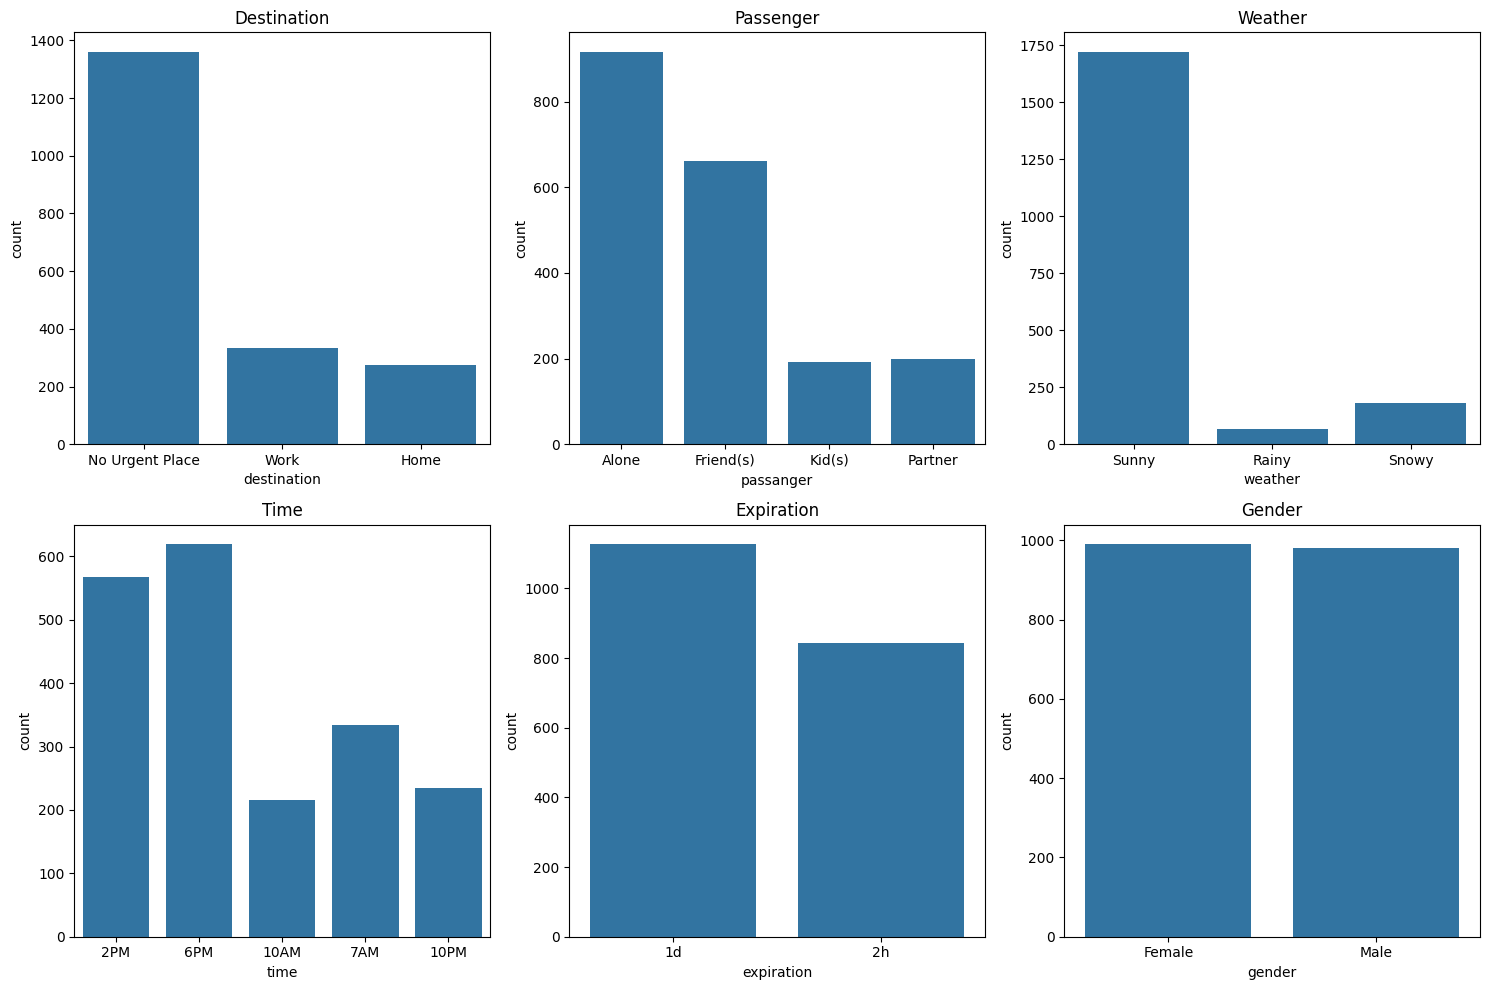

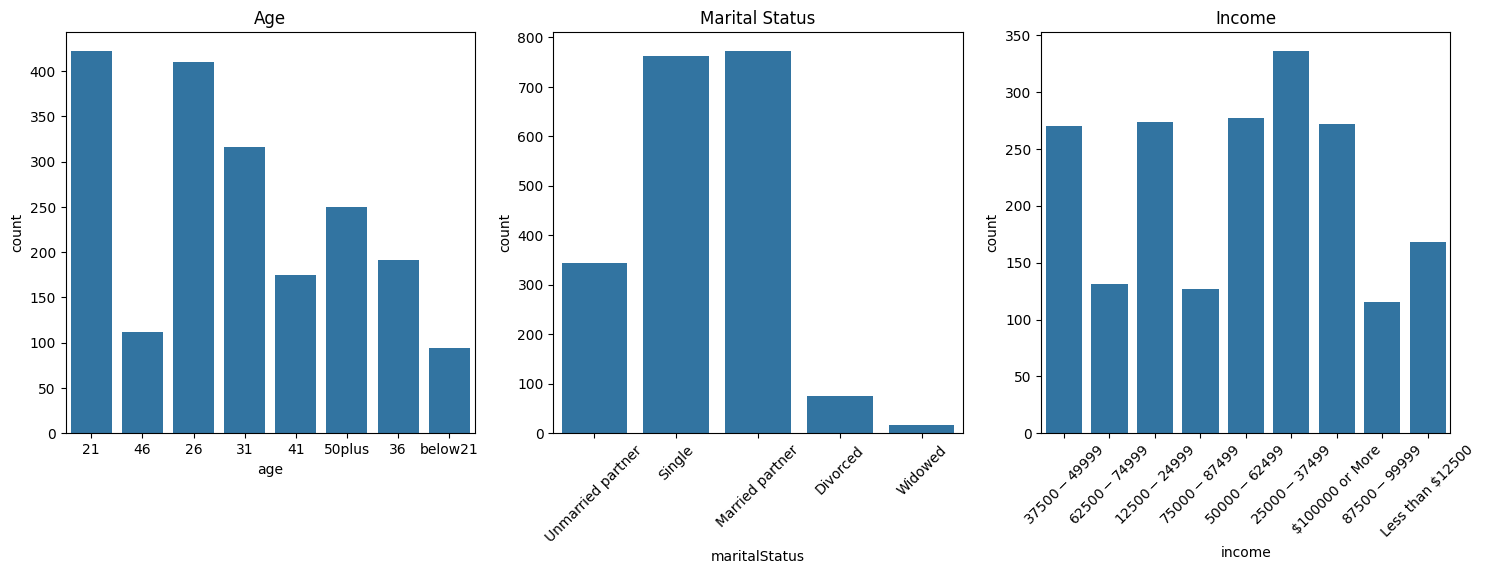

In [181]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot the characteristics of passengers who accept the coupon for Restaurant(<20)
plt.subplot(2, 3, 1)
sns.countplot(data=accepted_coupons, x='destination')
plt.title('Destination')

plt.subplot(2, 3, 2)
sns.countplot(data=accepted_coupons, x='passanger')
plt.title('Passenger')

plt.subplot(2, 3, 3)
sns.countplot(data=accepted_coupons, x='weather')
plt.title('Weather')

plt.subplot(2, 3, 4)
sns.countplot(data=accepted_coupons, x='time')
plt.title('Time')

plt.subplot(2, 3, 5)
sns.countplot(data=accepted_coupons, x='expiration')
plt.title('Expiration')

plt.subplot(2, 3, 6)
sns.countplot(data=accepted_coupons, x='gender')
plt.title('Gender')

plt.tight_layout()
plt.show()

# Plot additional characteristics
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=accepted_coupons, x='age')
plt.title('Age')

plt.subplot(2, 3, 2)
sns.countplot(data=accepted_coupons, x='maritalStatus')
plt.xticks(rotation=45)
plt.title('Marital Status')

plt.subplot(2, 3, 3)
sns.countplot(data=accepted_coupons, x='income')
plt.xticks(rotation=45)
plt.title('Income')

plt.tight_layout()
plt.show()

**ANALYSIS OF PASSENGERS WHO ACCEPTED COUPON FOR RESTAURANTS LESS THAN 20**

here are some key characteristics of passengers who accept the coupon for Restaurant(<20):
*   Destination: Most passengers were heading to "No Urgent Place".
*   Passenger: Many were traveling alone.
*   Weather: The majority of the trips were on sunny days.
*   Time: The most common time was 6 PM.
*   Expiration: The coupon was mostly valid for 1 day.
*   Gender: There was a slight majority of female passengers.
*   Age: The most common age was 21.
*   Marital Status: Many were married or had a partner.
*   Income: The income range varied, but many were in the $50,000 - $74,999 range.

**`ACCEPTANCE RATE FOR COUPON - RESTAURANT From 20 to 50`**



In [174]:
# Filter for rest_20 coupons
rest_20_50_coupons_df = data_1[data_1['coupon'] == 'Restaurant(20-50)']

# Calculate the acceptance rate for rest_20_50 coupons
acceptance_rate_rest_20_50 = rest_20_50_coupons_df['Y'].mean()
print("Acceptance Rate for rest_20_50 Coupons:", acceptance_rate_rest_20_50)

# Analyze the characteristics of passengers who accept rest_20 coupons
accepted_rest_20_50_coupons_df = rest_20_50_coupons_df[rest_20_50_coupons_df['Y'] == 1]

# Display basic information about the accepted rest_20_50 coupons DataFrame
print(accepted_rest_20_50_coupons_df.info())

# Display summary statistics for numerical columns
print(accepted_rest_20_50_coupons_df.describe())

Acceptance Rate for rest_20_50 Coupons: 0.4410187667560322
<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 14 to 12676
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           658 non-null    object
 1   passanger             658 non-null    object
 2   weather               658 non-null    object
 3   temperature           658 non-null    int64 
 4   time                  658 non-null    object
 5   coupon                658 non-null    object
 6   expiration            658 non-null    object
 7   gender                658 non-null    object
 8   age                   658 non-null    object
 9   maritalStatus         658 non-null    object
 10  has_children          658 non-null    int64 
 11  education             658 non-null    object
 12  occupation            658 non-null    object
 13  income                658 non-null    object
 14  car                   9 non-null 

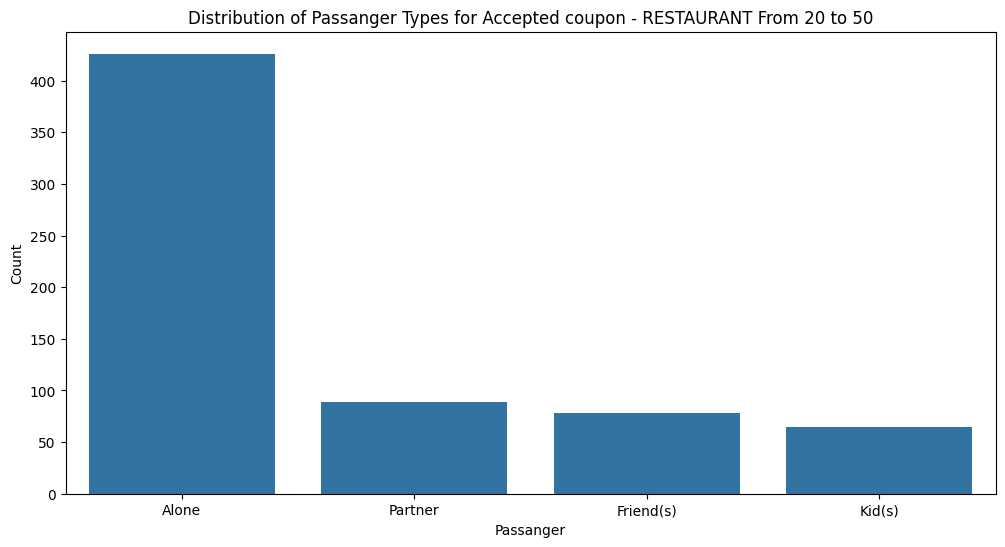

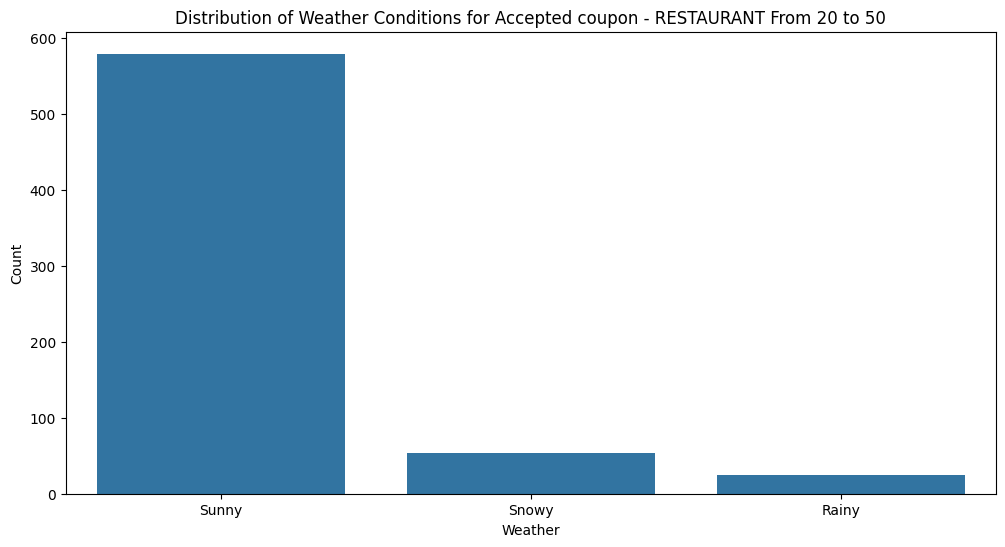

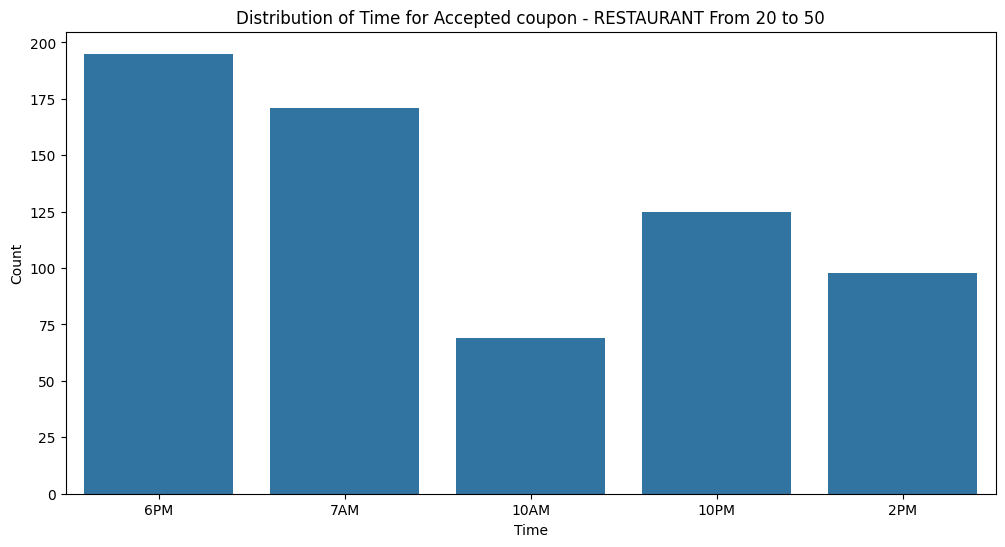

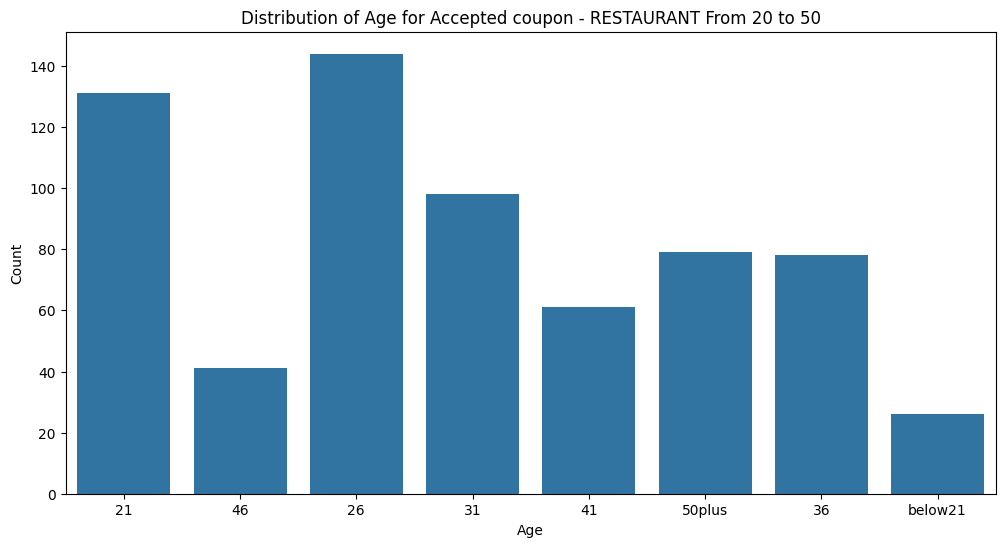

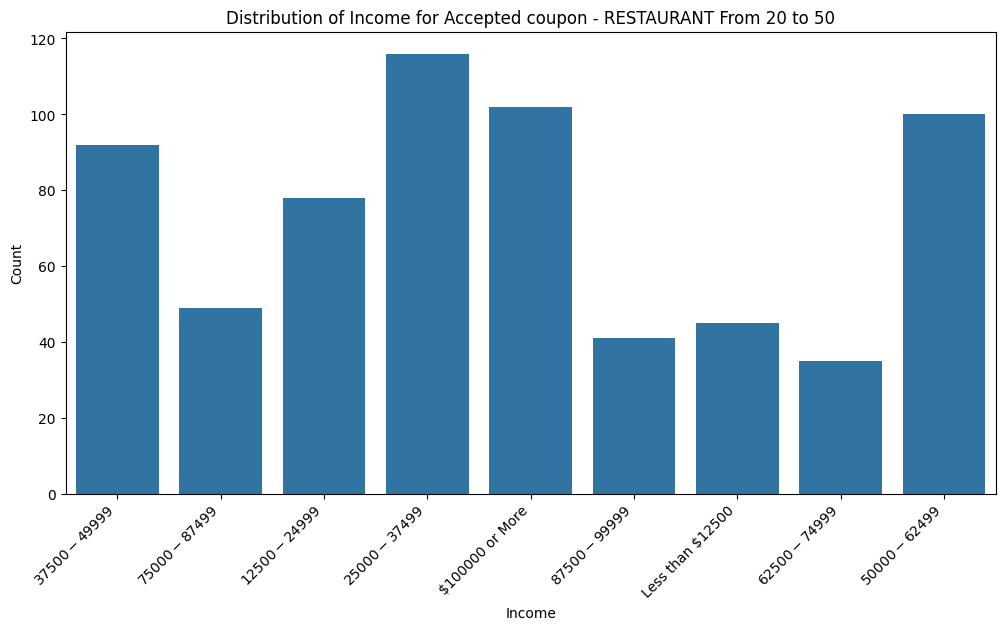

In [176]:
# Visualize the distribution of categorical variables for accepted coupon - RESTAURANT From 20 to 50
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=accepted_rest_20_50_coupons_df, x='passanger')
plt.title('Distribution of Passanger Types for Accepted coupon - RESTAURANT From 20 to 50')
plt.xlabel('Passanger')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=accepted_rest_20_50_coupons_df, x='weather')
plt.title('Distribution of Weather Conditions for Accepted coupon - RESTAURANT From 20 to 50')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=accepted_rest_20_50_coupons_df, x='time')
plt.title('Distribution of Time for Accepted coupon - RESTAURANT From 20 to 50')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=accepted_rest_20_50_coupons_df, x='age')
plt.title('Distribution of Age for Accepted coupon - RESTAURANT From 20 to 50')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=accepted_rest_20_50_coupons_df, x='income')
plt.title('Distribution of Income for Accepted coupon - RESTAURANT From 20 to 50')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Detailed Analysis of Passengers Who Accept Restaurant(20-50) Coupons
This analysis focuses on the characteristics of passengers who accepted coupons for Restaurant(20-50). Here are the key findings:

1. Destination
The majority of passengers were either heading home or to a non-urgent place, suggesting that these passengers might be more open to dining out when they don't have pressing commitments.

2. Passenger
A significant portion of passengers who accepted the coupon were traveling alone, indicating that solo travelers might be more inclined to use dining coupons.

3. Weather
Most coupon acceptances happened on sunny days, which could imply that good weather positively influences the decision to dine out.

4. Time
The most common times for accepting the coupon were in the evening (6 PM) and early afternoon (2 PM), suggesting that these are peak times for dining out.

5. Expiration
There is a nearly even split between 1-day and 2-hour expiration coupons, indicating that both short-term and slightly longer-term offers are effective.

6. Gender
The gender distribution is almost equal, suggesting that both males and females are equally likely to accept the coupon.

7. Age
Younger passengers (21-26 years old) are more likely to accept the coupon, indicating that this age group might be more responsive to dining offers.

8. Marital Status
Single passengers are the largest group accepting the coupon, followed by those with a partner (married or unmarried), suggesting that single individuals might be more inclined to dine out alone or with friends.

9. Income
The majority of passengers fall within the middle-income brackets ($25,000 - $74,999), indicating that these income groups are more likely to use dining coupons.

**ACCEPTANCE RATE FOR COUPON - Carry out & Take away**



In [179]:
# Filter for carryout coupons
carryout_coupons_df = data_1[data_1['coupon'] == 'Carry out & Take away']

# Calculate the acceptance rate for carryout coupons
acceptance_rate_carryout = carryout_coupons_df['Y'].mean()
print("Acceptance Rate for carryout Coupons:", acceptance_rate_carryout)

# Analyze the characteristics of passengers who accept carryout coupons
accepted_carryout_coupons_df = carryout_coupons_df[carryout_coupons_df['Y'] == 1]

# Display basic information about the accepted carryout coupons DataFrame
print(accepted_carryout_coupons_df.info())

# Display summary statistics for numerical columns
print(accepted_carryout_coupons_df.describe())

Acceptance Rate for carryout Coupons: 0.7354784788967823
<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 2 to 12680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1760 non-null   object
 1   passanger             1760 non-null   object
 2   weather               1760 non-null   object
 3   temperature           1760 non-null   int64 
 4   time                  1760 non-null   object
 5   coupon                1760 non-null   object
 6   expiration            1760 non-null   object
 7   gender                1760 non-null   object
 8   age                   1760 non-null   object
 9   maritalStatus         1760 non-null   object
 10  has_children          1760 non-null   int64 
 11  education             1760 non-null   object
 12  occupation            1760 non-null   object
 13  income                1760 non-null   object
 14  car                   13 non-null  

In [177]:
# Filter the rows where the coupon is for Carry out & Take away and the coupon is accepted (Y == 1)
accepted_coupons_carryout = data_1[(data_1['coupon'] == 'Carry out & Take away') & (data_1['Y'] == 1)]

# Determine the characteristics of passengers who accept the coupon for Carry out & Take away
characteristics_carryout = accepted_coupons_carryout.describe(include='all')

# Print the characteristics
print(characteristics_carryout)

            destination passanger weather  temperature  time  \
count              1760      1760    1760  1760.000000  1760   
unique                3         4       3          NaN     5   
top     No Urgent Place     Alone   Sunny          NaN   7AM   
freq                746      1022    1348          NaN   499   
mean                NaN       NaN     NaN    57.982955   NaN   
std                 NaN       NaN     NaN    21.664524   NaN   
min                 NaN       NaN     NaN    30.000000   NaN   
25%                 NaN       NaN     NaN    30.000000   NaN   
50%                 NaN       NaN     NaN    55.000000   NaN   
75%                 NaN       NaN     NaN    80.000000   NaN   
max                 NaN       NaN     NaN    80.000000   NaN   

                       coupon expiration  gender   age maritalStatus  ...  \
count                    1760       1760    1760  1760          1760  ...   
unique                      1          2       2     8             5  ...   


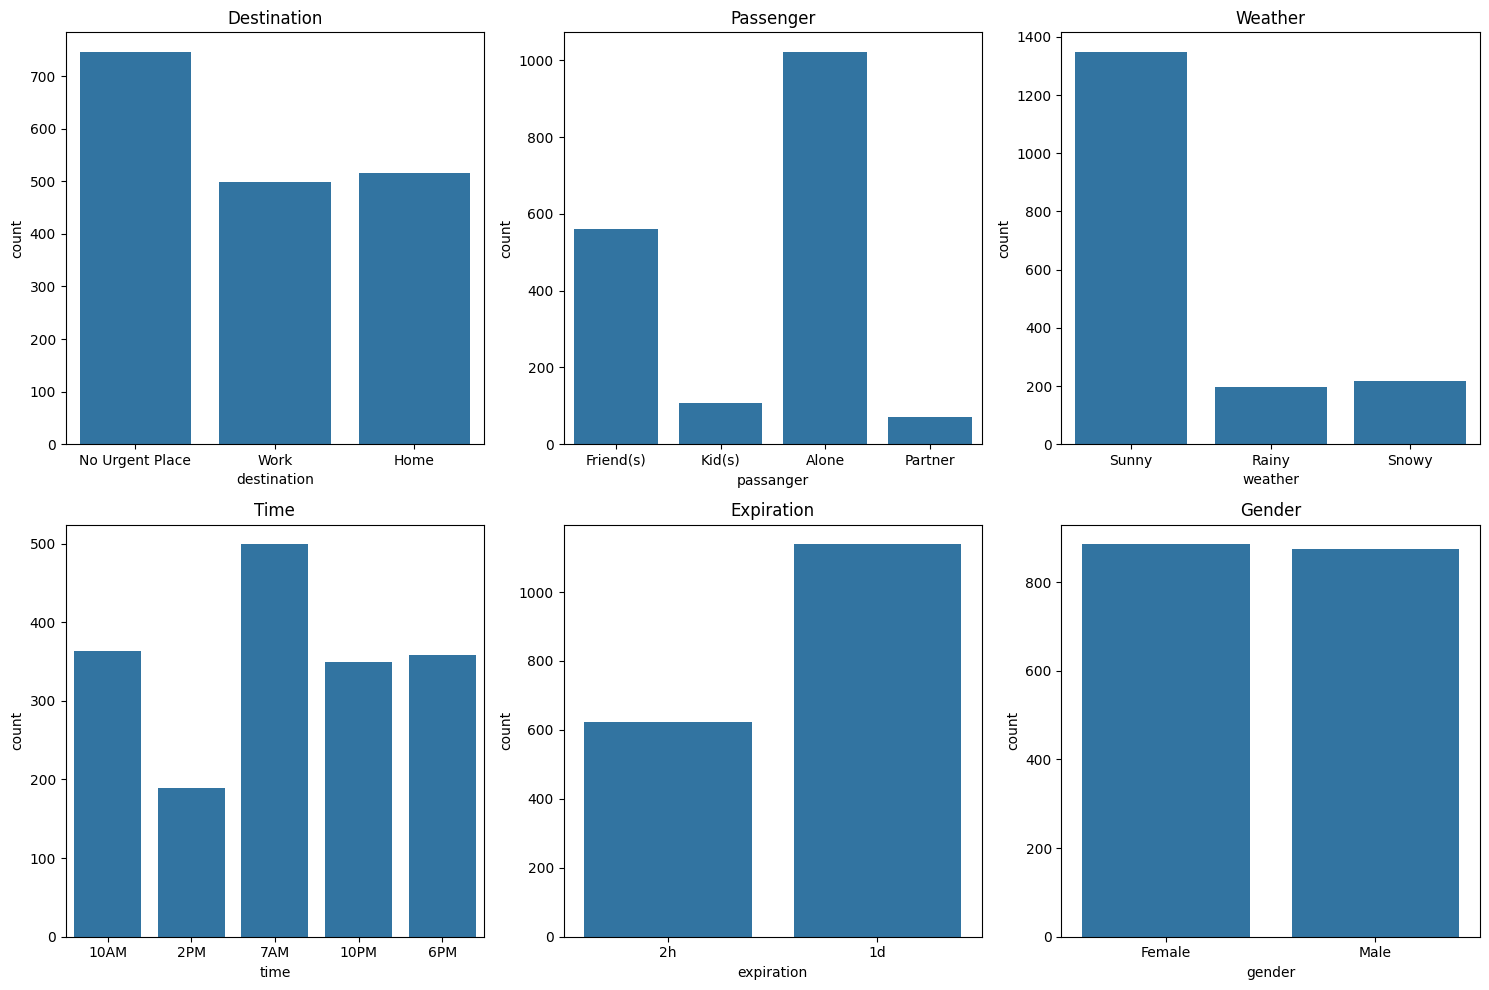

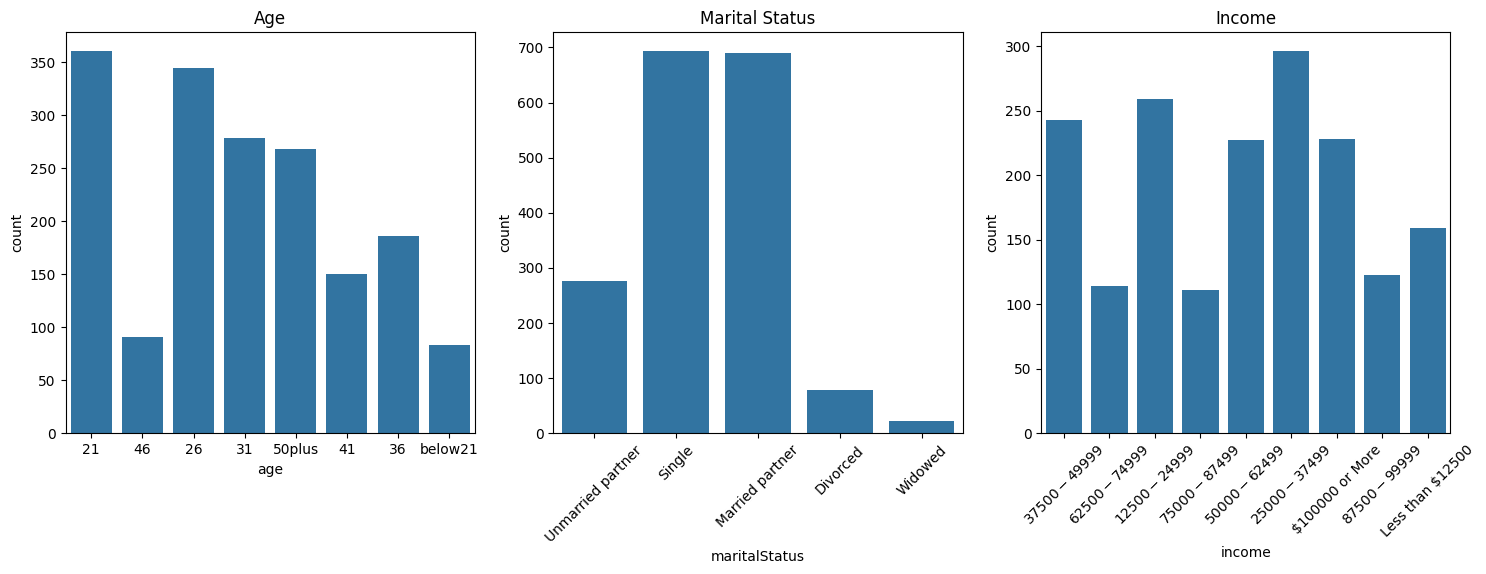

In [182]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot the characteristics of passengers who accept the coupon for Carry out & Take away
plt.subplot(2, 3, 1)
sns.countplot(data=accepted_coupons_carryout, x='destination')
plt.title('Destination')

plt.subplot(2, 3, 2)
sns.countplot(data=accepted_coupons_carryout, x='passanger')
plt.title('Passenger')

plt.subplot(2, 3, 3)
sns.countplot(data=accepted_coupons_carryout, x='weather')
plt.title('Weather')

plt.subplot(2, 3, 4)
sns.countplot(data=accepted_coupons_carryout, x='time')
plt.title('Time')

plt.subplot(2, 3, 5)
sns.countplot(data=accepted_coupons_carryout, x='expiration')
plt.title('Expiration')

plt.subplot(2, 3, 6)
sns.countplot(data=accepted_coupons_carryout, x='gender')
plt.title('Gender')

plt.tight_layout()
plt.show()

# Plot additional characteristics
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=accepted_coupons_carryout, x='age')
plt.title('Age')

plt.subplot(2, 3, 2)
sns.countplot(data=accepted_coupons_carryout, x='maritalStatus')
plt.xticks(rotation=45)
plt.title('Marital Status')

plt.subplot(2, 3, 3)
sns.countplot(data=accepted_coupons_carryout, x='income')
plt.xticks(rotation=45)
plt.title('Income')

plt.tight_layout()
plt.show()

**Detailed Analysis of Passengers Who Accept Carry Out & Take Away Coupons**

This analysis focuses on the characteristics of passengers who accepted coupons for Carry Out & Take Away. Here are the key findings:

1. Destination
A significant portion of passengers were heading to non-urgent places or home, suggesting that these passengers might be more open to picking up food on their way.

2. Passenger
A majority of passengers who accepted the coupon were traveling alone, indicating that solo travelers might be more inclined to use carry-out and take-away coupons.

3. Weather
Most coupon acceptances happened on sunny days, which could imply that good weather positively influences the decision to pick up food.

4. Time
The most common times for accepting the coupon were early morning (7 AM) and mid-morning (10 AM), suggesting that these are peak times for picking up food.

5. Expiration
There is a nearly even split between 1-day and 2-hour expiration coupons, indicating that both short-term and slightly longer-term offers are effective.

6. Gender
The gender distribution is almost equal, suggesting that both males and females are equally likely to accept the coupon.

7. Age
Younger passengers (21-26 years old) are more likely to accept the coupon, indicating that this age group might be more responsive to carry-out and take-away offers.

8. Marital Status
Single passengers are the largest group accepting the coupon, followed by those with a partner (married or unmarried), suggesting that single individuals might be more inclined to use carry-out and take-away coupons.

9. Income
The majority of passengers fall within the middle-income brackets ($25,000 - $74,999), indicating that these income groups are more likely to use carry-out and take-away coupons.